In [32]:
import pandas as pd
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import yfinance as yf
yf.pdr_override()

In [33]:
dados_bancarios = pdr.get_data_yahoo(['ITUB4.SA', 'BBAS3.SA', 'SANB4.SA', 'BBDC4.SA', '^BVSP'], 
                                     start = "2010-01-01", end = '2022-04-30')['Adj Close']

dados_bancarios

[*********************100%***********************]  5 of 5 completed


,BBAS3.SA,BBDC4.SA,ITUB4.SA,SANB4.SA,^BVSP
Date,,,,,
2010-01-04,12.759056,7.674427,10.893439,5.563494,70045.0
2010-01-05,12.631047,7.636658,10.964027,5.563494,70240.0
2010-01-06,12.648113,7.575562,10.868996,5.563494,70729.0
2010-01-07,12.652389,7.555197,10.757670,5.563494,70451.0
2010-01-08,12.724931,7.547054,10.594763,5.563494,70263.0
...,...,...,...,...,...
2022-04-25,32.742828,17.946095,24.603920,16.824755,110685.0
2022-04-26,32.006824,17.175636,23.766792,16.059992,108213.0
2022-04-27,32.148357,17.278992,23.574347,16.069551,109349.0


In [37]:
# Define a ação da empresa e o período desejado
acao = "PETR4.SA"
inicio = "2016-01-01"
fim = "2021-12-31"

# Use a função Ticker para obter os dados financeiros da empresa
empresa = yf.Ticker(acao)

# Use a função financials para obter os dados financeiros
dados_fin = empresa.income_stmt(as_dict=True, pretty=True)
dados_fin

# Filtra o lucro líquido
#lucro_liquido = dados_fin.loc["Net Income", inicio:fim]

# Exibir os dados de lucro líquido
#print(lucro_liquido)

Exception: yfinance failed to decrypt Yahoo data response

In [ ]:
#Puxar da fundamentus?

lucro_bancos = pd.read_excel('Minicurso_python_planilha_2022.xlsx', index_col = "data")

lucro_bancos

,bradesco,banco_do_brasil,itau,santander
data,,,,
2009-12-31,8012282,10147522,10066608,1805899
2021-12-31,21945688,19710402,24988000,14987716


In [ ]:
itau = dados_bancarios['ITUB4.SA']
santander = dados_bancarios['SANB4.SA']
banco_do_brasil = dados_bancarios['BBAS3.SA']
bradesco = dados_bancarios['BBDC4.SA']
dados_mercado = dados_bancarios['^BVSP']

In [ ]:
def retorno(lista):
    retorno = lista[-1]/lista[0] - 1
    
    return retorno 

In [ ]:
retorno_itau = retorno(lista = itau)
retorno_banco_brasil = retorno(lista = banco_do_brasil)
retorno_bradesco = retorno(lista = bradesco)
retorno_santander = retorno(lista = santander)
retorno_mercado = retorno(lista = dados_mercado)

In [ ]:
retorno_itau, retorno_banco_brasil, retorno_bradesco, retorno_santander, retorno_mercado

(1.1084403609968736,
 1.456786644592024,
 1.2013078441758558,
 1.8574625487304686,
 0.5400956527946321)

In [ ]:
df_retornos = pd.DataFrame(data = {'retornos': [retorno_itau, retorno_banco_brasil, 
                                   retorno_bradesco, retorno_santander, retorno_mercado]}, 
                           index = ["Itau", "Banco_do_Brasil", "Bradesco", "Santander", "Ibovespa"])

df_retornos

,retornos
Itau,1.108440
Banco_do_Brasil,1.456787
Bradesco,1.201308
Santander,1.857463
Ibovespa,0.540096


In [ ]:
df_retornos['retornos'] = df_retornos['retornos'] * 100

In [ ]:
df_retornos = df_retornos.sort_values(by = "retornos", ascending = False)

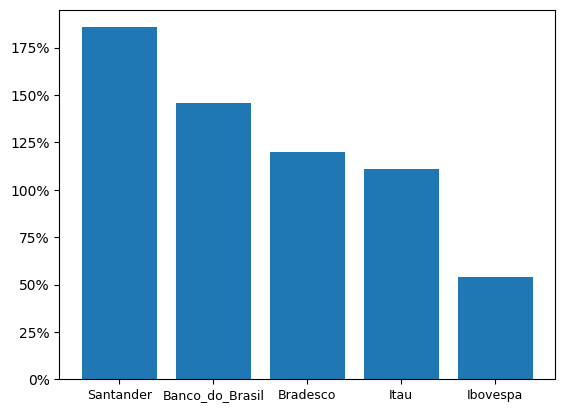

In [ ]:
fig, ax = plt.subplots()

ax.bar(df_retornos.index , df_retornos['retornos'])
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.xticks(fontsize = 9)

plt.show()

In [ ]:
var_lucro_bancos = lucro_bancos.iloc[-1]/lucro_bancos.iloc[0] - 1

var_lucro_bancos = var_lucro_bancos  * 100

var_lucro_bancos = var_lucro_bancos.sort_values(ascending = False)

var_lucro_bancos

santander          729.931021
bradesco           173.900594
itau               148.226612
banco_do_brasil     94.238574
dtype: float64

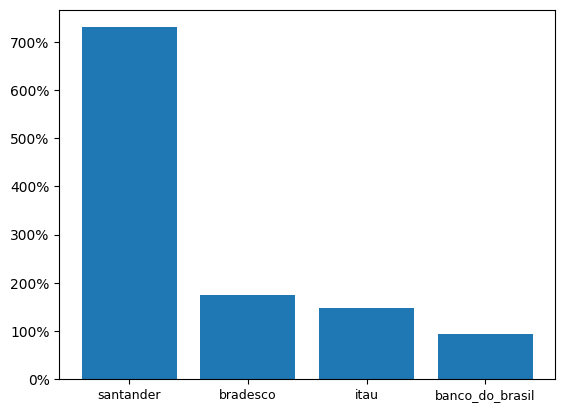

In [ ]:
fig, ax = plt.subplots()

ax.bar(var_lucro_bancos.index , var_lucro_bancos)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.xticks(fontsize = 9)

plt.show()

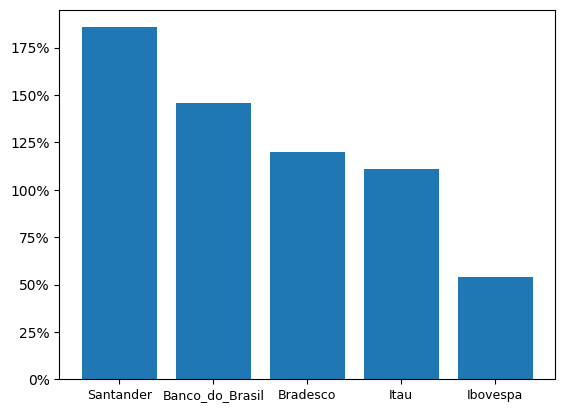

In [ ]:
fig, ax = plt.subplots()

ax.bar(df_retornos.index , df_retornos['retornos'])
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.xticks(fontsize = 9)

plt.show()

# Testando correlação

A fazer depois de conseguir importar os dados históricos dos resultados